# Lab Assignment 2 - Marie Huckstep
### Student ID: 200014086 
### Link to GitHub Repository: 

In [1]:
from arcgis.gis import GIS
gis = GIS("home")

## Part 1: Python Basics

### Task 1

In [2]:
def check_divisibility(number):
    if number % 3 == 0:
        return "{} is divisible by 3".format(number)
    else:
        return "{} is not divisible by 3".format(number)
    
check_divisibility(33)

'33 is divisible by 3'

### Task 2

In [3]:
def check_fruit_acceptability(fruit):
    acceptable_fruit = ['apple', 'orange', 'pear', 'kiwi', 'strawberry']
    if fruit.lower() in acceptable_fruit:
        return "{} is acceptable.".format(fruit)
    else:
        return "{} is not acceptable.".format(fruit)
    
check_fruit_acceptability('peach')

'peach is not acceptable.'

### Task 3 

In [4]:
import math as m

def haversine_distance(A, B):
    R = 6371 
    
    # Convert latitude and longitude from degrees to radians
    φ1, λ1 = m.radians(A[0]), m.radians(A[1])
    φ2, λ2 = m.radians(B[0]), m.radians(B[1])
    delta_φ = φ2 - φ1
    delta_λ = λ2 - λ1
    
    # Calculate Haversine formula components
    a = m.sin(delta_φ / 2)**2 + m.cos(φ1) * m.cos(φ2) * m.sin(delta_λ / 2)**2
    c = 2 * m.atan2(m.sqrt(a), m.sqrt(1 - a))

    # Calculate distance using Haversine formula
    distance = R * c
    return distance

coordinate_Edi = [55.9533, -3.1882]
coordinate_Lon = [51.5074, -0.1278]
    
distance = haversine_distance(coordinate_Edi, coordinate_Lon)
print(f"The distance between the Edinburgh and London is approximately {distance:.2f} kilometers.")


The distance between the Edinburgh and London is approximately 533.65 kilometers.


## Part 2: Pandas & NumPy

In [5]:
dataset = '/arcgis/home/Assignment2Data/portland_park_trees.csv'

In [6]:
import numpy as np
import pandas as pd

### Q1: How many trees are of the Quercus or Acer genus?

In [7]:
#Read the datafile
trees_df = pd.read_csv('/arcgis/home/Assignment2Data/portland_park_trees.csv', sep=",", header=0, encoding="ISO-8859-1")

In [8]:
# Create a sample with only Genus and DBH in
small_sample = trees_df[["Genus","DBH"]] 
small_sample.head()

Genus   DBH
0  Pseudotsuga  37.4
1  Pseudotsuga  32.5
2    Crataegus   9.7
3      Quercus  10.3
4  Pseudotsuga  33.2

In [9]:
# Create a new sample where Genus = only Quercus or Acer
New_sample = small_sample['Genus'].isin(['Quercus', 'Acer'])
New_sample

New_GDF = small_sample[New_sample]
New_GDF

Genus   DBH
3      Quercus  10.3
11     Quercus  14.9
24        Acer   6.6
25        Acer   6.2
30        Acer  17.3
...        ...   ...
25506     Acer  63.0
25508     Acer  35.0
25511     Acer  38.4
25516     Acer  19.0
25529  Quercus  31.6

[5675 rows x 2 columns]

#### A1: 5,675

### Q2: How many trees are of the Quercus or Acer genus and have a DBH larger than 50 inches?

In [10]:
# Create a new sample with only Quercus and Acer Genus & those with DBH > 50 inches

New_sample = small_sample['Genus'].isin(['Quercus', 'Acer']) & (small_sample['DBH'] > 50)
New_sample

New_GDF = small_sample[New_sample]
New_GDF

Genus   DBH
127       Acer  50.5
152       Acer  50.5
154       Acer  52.7
162       Acer  56.3
593       Acer  50.9
...        ...   ...
23957     Acer  59.5
24271  Quercus  69.9
24461  Quercus  59.0
25499     Acer  84.5
25506     Acer  63.0

[124 rows x 2 columns]

#### A2: 124

### Q3: Which genus has the highest mean DBH of the following genera: Quercus, Acer, or Fraxinus?

In [11]:
# Create a new sample with only Quercus, Acer and Fraxinus genera

New_sample = small_sample['Genus'].isin(['Quercus', 'Acer', 'Fraxinus']) & (small_sample['DBH'])
New_sample

New_GDF = small_sample[New_sample]
New_GDF

Genus   DBH
3       Quercus  10.3
11      Quercus  14.9
24         Acer   6.6
25         Acer   6.2
26     Fraxinus  20.3
...         ...   ...
25506      Acer  63.0
25508      Acer  35.0
25511      Acer  38.4
25516      Acer  19.0
25529   Quercus  31.6

[6457 rows x 2 columns]

In [12]:
# Calculate the Mean DBH of each Genus
mean_dbh = New_GDF.groupby('Genus')['DBH'].mean()
mean_dbh

Genus
Acer        18.419085
Fraxinus    11.033610
Quercus     23.590824
Name: DBH, dtype: float64

#### A3: Quercus with a mean DBH of 23.59

### Q4: How may different species of trees are recorded in the Acer genus?

In [13]:
small_sample = trees_df[trees_df['Genus'] == "Acer"]
small_sample.shape
# Count number of species within the new sample
print(small_sample['Genus_spec'].nunique())

20


### Q5: Writing new scripts

In [14]:
dataset = '/arcgis/home/Assignment2Data/world_cities.csv'
import pandas as pd

In [15]:
# Read world_cities.csv file as a Pandas dataframe
world_cities = pd.read_csv('/arcgis/home/Assignment2Data/world_cities.csv', sep=",", header=0, encoding="ISO-8859-1")
world_cities.head()

city    country    pop    lat    lon  capital
0  'Abasan al-Jadidah  Palestine   5629  31.31  34.34        0
1  'Abasan al-Kabirah  Palestine  18999  31.32  34.35        0
2        'Abdul Hakim   Pakistan  47788  30.55  72.11        0
3  'Abdullah-as-Salam     Kuwait  21817  29.36  47.98        0
4               'Abud  Palestine   2456  32.03  35.07        0

In [16]:
# Calculate a new column named "pop_M" by dividing "pop" column by 1,000,000
world_cities['pop_M'] = world_cities['pop'] / 1000000
world_cities.head()

city    country    pop    lat    lon  capital     pop_M
0  'Abasan al-Jadidah  Palestine   5629  31.31  34.34        0  0.005629
1  'Abasan al-Kabirah  Palestine  18999  31.32  34.35        0  0.018999
2        'Abdul Hakim   Pakistan  47788  30.55  72.11        0  0.047788
3  'Abdullah-as-Salam     Kuwait  21817  29.36  47.98        0  0.021817
4               'Abud  Palestine   2456  32.03  35.07        0  0.002456

In [17]:
# Remove the original "pop" column
world_cities.drop(columns='pop', inplace=True)
world_cities.head()

city    country    lat    lon  capital     pop_M
0  'Abasan al-Jadidah  Palestine  31.31  34.34        0  0.005629
1  'Abasan al-Kabirah  Palestine  31.32  34.35        0  0.018999
2        'Abdul Hakim   Pakistan  30.55  72.11        0  0.047788
3  'Abdullah-as-Salam     Kuwait  29.36  47.98        0  0.021817
4               'Abud  Palestine  32.03  35.07        0  0.002456

In [18]:
# Choose a city that starts with the letter 'M'
world_cities[world_cities['city'].str.startswith('Madrid')].head()

city   country    lat    lon  capital     pop_M
22031      Madrid  Colombia   4.74 -74.27        0  0.051654
22032      Madrid     Spain  40.42  -3.71        1  3.146804
22033  Madridejos     Spain  39.47  -3.54        0  0.011000

In [19]:
# Filter cities from Spain
spain_cities = world_cities[world_cities['country'] == 'Spain']

In [20]:
# Sort cities within Spain by population in descending order
spain_cities_order = spain_cities.sort_values(by='pop_M', ascending=False)
# Subset the five biggest cities from Spain
biggest_cities = spain_cities_order.head(5)

In [21]:
# Print the result
print(biggest_cities)

            city country    lat   lon  capital     pop_M
22032     Madrid   Spain  40.42 -3.71        1  3.146804
3385   Barcelona   Spain  41.40  2.17        0  1.591485
39931   Valencia   Spain  39.48 -0.39        0  0.803438
34629    Sevilla   Spain  37.40 -5.98        0  0.702516
42691   Zaragoza   Spain  41.65 -0.89        0  0.658186


#### A5: 5 Largest Cities in Spain: Madrid, Barcelona, Valencia, Sevilla, Zaragoza

## Part 3: Python Data Visualization

In [22]:
dataset = '/arcgis/home/Assignment2Data/portland_park_trees.csv'

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Change the default plot size
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

### Graph 1

In [24]:
trees_df = pd.read_csv('/arcgis/home/Assignment2Data/portland_park_trees.csv', header=0)
trees_df.columns =[column.replace(" ", "_") for column in trees_df.columns]
trees_df.head(5)

fid  OBJECTID  Inventory_ Species   DBH Condition  TreeHeight  CrownWidth  \
0    1       426  2017/05/09    PSME  37.4      Fair       105.0        44.0   
1    2       427  2017/05/09    PSME  32.5      Fair        94.0        49.0   
2    3       428  2017/05/09    CRLA   9.7      Fair        23.0        28.0   
3    4       429  2017/05/09    QURU  10.3      Poor        28.0        38.0   
4    5       430  2017/05/09    PSME  33.2      Fair       102.0        43.0   

   CrownWid_1 CollectedB  ...        Genus        Common_nam  \
0        57.0      staff  ...  Pseudotsuga       Douglas-fir   
1        45.0      staff  ...  Pseudotsuga       Douglas-fir   
2        27.0      staff  ...    Crataegus  Lavalle hawthorn   
3        31.0      staff  ...      Quercus  northern red oak   
4        44.0      staff  ...  Pseudotsuga       Douglas-fir   

              Genus_spec Functional Size Native Edible Nuisance  \
0  Pseudotsuga menziesii         CE    L    Yes    NaN      NaN   
1  Pseudotsuga menziesii         CE    L    Yes    NaN      NaN   
2  Crataegus x lavalleei         BD    S     No    NaN      NaN   
3          Quercus rubra         BD    L     No    NaN      NaN   
4  Pseudotsuga menziesii         CE    L    Yes    NaN      NaN   

                                              Origin  \
0  North America - from British Columbia south to...   
1  North America - from British Columbia south to...   
2  North America - a hybrid between a Mexican and...   
3  North America - eastern Canada and eastern USA...   
4  North America - from British Columbia south to...   

                                          Species_fa  
0  Bracts on cones look like a mouse's feet and t...  
1  Bracts on cones look like a mouse's feet and t...  
2  Like most hawthorns, the tree has stout thorns...  
3  Acorns take two years to mature and are an imp...  
4  Bracts on cones look like a mouse's feet and t...  

[5 rows x 40 columns]

In [25]:
# Create a new sample with just trees in the Ulmus genus (with DBH and Tree Height)
small_sample = trees_df[["Genus","DBH", "TreeHeight"]] 

New_sample = small_sample['Genus'].isin(['Ulmus'])
New_sample

New_GDF = small_sample[New_sample]
New_GDF

Genus   DBH  TreeHeight
57     Ulmus  40.5        75.0
58     Ulmus  48.5        96.0
59     Ulmus  34.0        74.0
60     Ulmus  35.0        60.0
63     Ulmus  35.5        79.0
...      ...   ...         ...
24765  Ulmus   7.9        21.0
24767  Ulmus   3.5        18.0
24768  Ulmus   3.7        30.0
24776  Ulmus   3.5        17.0
24791  Ulmus   5.9        30.0

[626 rows x 3 columns]

Text(0.5, 1.0, 'Scatterplot of DBH vs. Tree Height of the Ulmus genus')

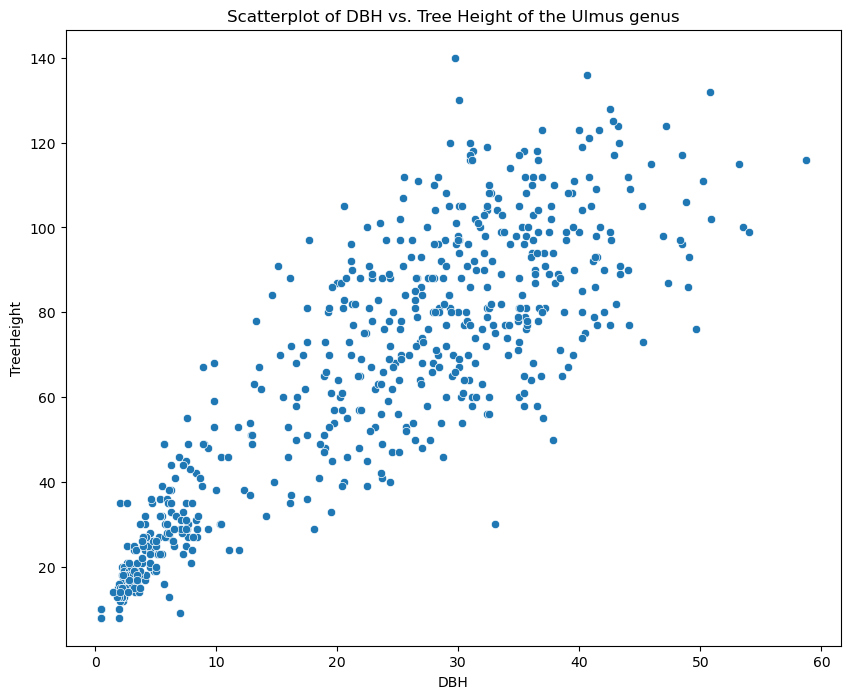

In [26]:
# Use Seaborn to create a Scatterplot
sns.scatterplot(x="DBH", y="TreeHeight", data=New_GDF)
plt.title('Scatterplot of DBH vs. Tree Height of the Ulmus genus')

### Graph 2

In [27]:
# Create a new sample with just trees in the Ulmus genus (with DBH & Tree Height & Species)
small_sample = trees_df[["Genus","DBH", "TreeHeight", "Genus_spec"]] 

New_sample = small_sample['Genus'].isin(['Ulmus'])
New_sample

New_GDF = small_sample[New_sample]
New_GDF

Genus   DBH  TreeHeight       Genus_spec
57     Ulmus  40.5        75.0     Ulmus pumila
58     Ulmus  48.5        96.0     Ulmus pumila
59     Ulmus  34.0        74.0     Ulmus pumila
60     Ulmus  35.0        60.0     Ulmus pumila
63     Ulmus  35.5        79.0     Ulmus pumila
...      ...   ...         ...              ...
24765  Ulmus   7.9        21.0  Ulmus americana
24767  Ulmus   3.5        18.0  Ulmus americana
24768  Ulmus   3.7        30.0  Ulmus americana
24776  Ulmus   3.5        17.0  Ulmus americana
24791  Ulmus   5.9        30.0  Ulmus americana

[626 rows x 4 columns]

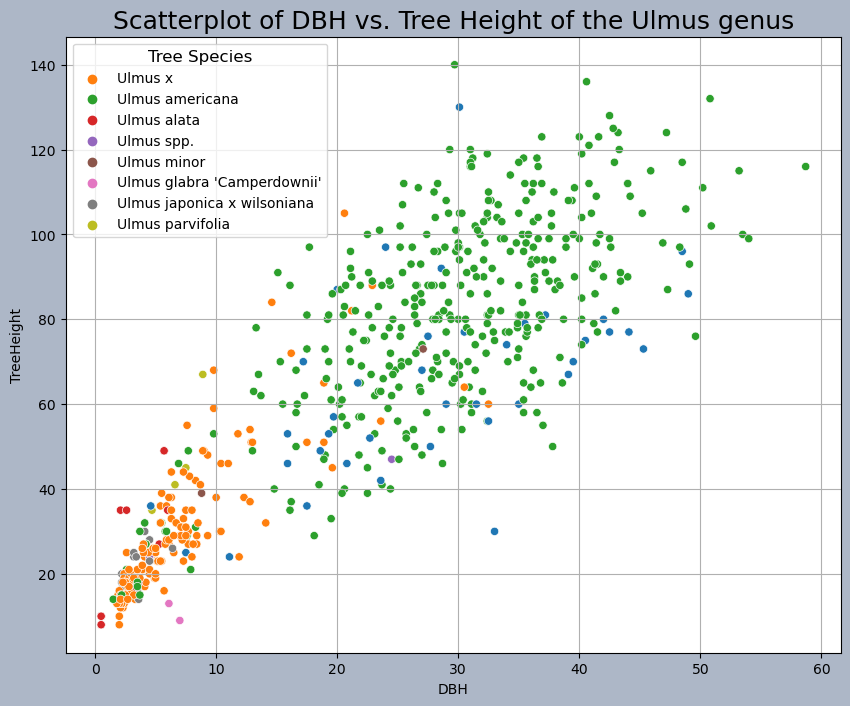

In [28]:
# Create a scatterplot for Ulmus genus with DBH, Tree Height and Tree Species mapped to hue
fig, axs = plt.subplots(1, 1)
sns.scatterplot(ax=axs, x="DBH", y="TreeHeight", hue="Genus_spec", data=New_GDF)
axs.set_title("Scatterplot of DBH vs. Tree Height of the Ulmus genus", fontsize=18, color="#000000")
handles, labels = axs.get_legend_handles_labels()
axs.legend(handles=handles[1:], labels=labels[1:], title="Tree Species", title_fontsize=12) 
axs.grid(True)
fig.patch.set_facecolor('#adb7c7')
plt.show(fig)

### Graph 3

In [29]:
# Create a new sample with DBH and species within the Ulmus genus 
small_sample = trees_df[["Genus","DBH", "Genus_spec", "TreeHeight"]] 

New_sample = small_sample['Genus'].isin(['Ulmus'])
New_sample

New_GDF = small_sample[New_sample]
New_GDF

Genus   DBH       Genus_spec  TreeHeight
57     Ulmus  40.5     Ulmus pumila        75.0
58     Ulmus  48.5     Ulmus pumila        96.0
59     Ulmus  34.0     Ulmus pumila        74.0
60     Ulmus  35.0     Ulmus pumila        60.0
63     Ulmus  35.5     Ulmus pumila        79.0
...      ...   ...              ...         ...
24765  Ulmus   7.9  Ulmus americana        21.0
24767  Ulmus   3.5  Ulmus americana        18.0
24768  Ulmus   3.7  Ulmus americana        30.0
24776  Ulmus   3.5  Ulmus americana        17.0
24791  Ulmus   5.9  Ulmus americana        30.0

[626 rows x 4 columns]

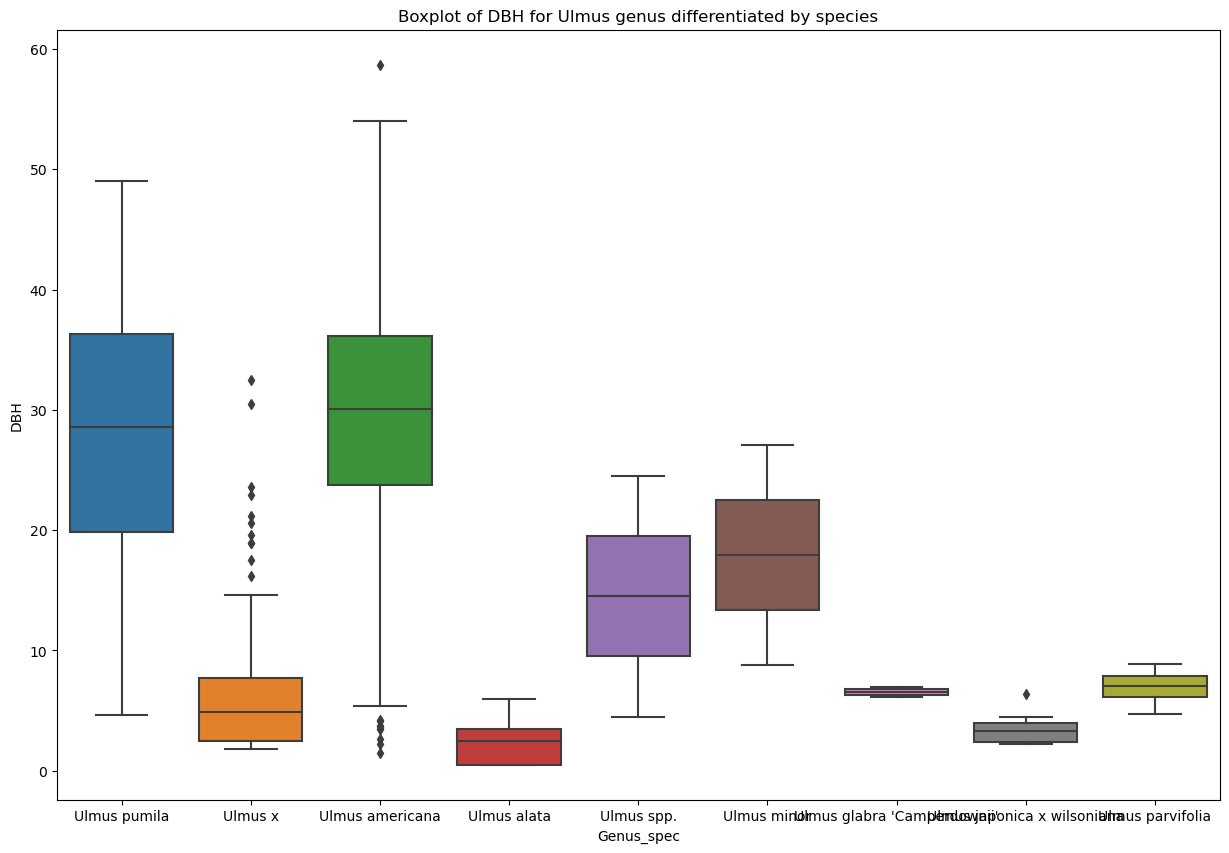

In [30]:
# Create a boxplot differentiated by Species by hue
plt.figure(figsize=(15, 10))
sns.boxplot(data=New_GDF, x='Genus_spec', y='DBH')
plt.title('Boxplot of DBH for Ulmus genus differentiated by species')
plt.show()

### Graph 4

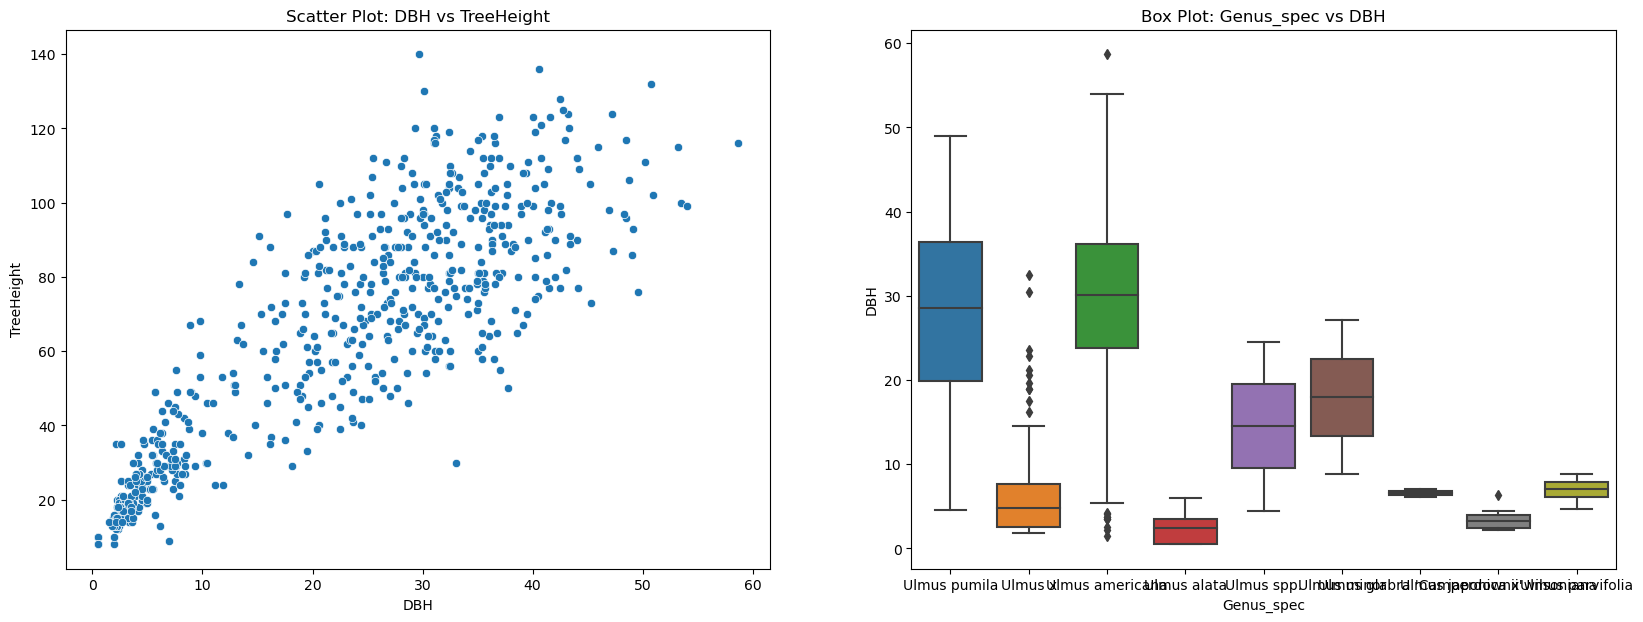

In [31]:
plt.rcParams['figure.figsize'] = [20, 7]
fig1, axs = plt.subplots(1,2)

sns.scatterplot(x="DBH", y="TreeHeight", data=New_GDF, ax=axs[0])
axs[0].set_title('Scatter Plot: DBH vs TreeHeight')

sns.boxplot(data=New_GDF, x='Genus_spec', y='DBH', ax=axs[1])
axs[1].set_title('Box Plot: Genus_spec vs DBH')

plt.show(fig1)

## Part 4: Python GeoPandas

In [48]:
pip install geopandas fiona shapely pyproj rtree contextily folium matplotlib mapclassify

  Obtaining dependency information for contextily from https://files.pythonhosted.org/packages/83/35/562e72099bf50228fa2a8e161db35a94090f3939cb73aa54e385096ca3ff/contextily-1.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/a2/1a/37c7ee1bc806d6c32621fecc72c19f6a9f9b4369e5e8f406a7c16d49f031/folium-0.15.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for mapclassify from https://files.pythonhosted.org/packages/3f/f1/8db36df379703311c16e5341b408dad04e34cfded66f38e351c380fbd5ae/mapclassify-2.6.1-py3-none-any.whl.metadata
  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e1/58/9289c6a03116025cdb61461d99b2493daa4967a80b13755463d71a0affeb/geopy-2.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for xyzservices from https://files.pythonhosted.org/packages/82/c3/e06dfa46464cce3eda4b86df8847cab99d9bc545c76807ee689545187a4c/xyzservices-2023.10.1-py3-no

In [49]:
import geopandas as gpd

### Task 1

In [50]:
dataset = '/arcgis/home/Assignment2Data/LLTNPLCA_SCOTLAND.shp'

In [51]:
dataset = '/arcgis/home/Assignment2Data/LLTNPLCA_SCOTLAND.shx'

In [52]:
dataset = '/arcgis/home/Assignment2Data/LLTNPLCA_SCOTLAND.dbf'

In [54]:
# Download the dataset as GeoPandas DataFrame
LCA_df = gpd.read_file('/arcgis/home/Assignment2Data/LLTNPLCA_SCOTLAND.shp')

In [55]:
# Read the dataset
LCA_df.head()

OBJECTID_1  OBJECTID        LENGTH EDIT_HISTO NEW_CODE ATTRIBUTE1  \
0           0       123   5227.151418       None     HLFO         HL   
1           0       124  10154.187654       None     UGOP         UG   
2           0      1494  53116.484330      DS25k     UGOP         UG   
3           0      1494  53116.484330      DS25k     GSOP         GS   
4           0      1500  10718.850366       None     GSFO         GS   

  ATTRIBUTE2  ISSUE ISSUE_DESC    SHAPE_LENG  ...      TYPE  \
0         FO      0       None   5421.814418  ...  Highland   
1         OP      0       None  10065.528840  ...  Highland   
2         OP      0       None  60563.406681  ...  Highland   
3         OP      0       None  60563.406681  ...  Highland   
4         FO      0       None  11635.685624  ...  Highland   

               LANDSCAPE_  LAND_COVER                       LCT_NAME_I AREA  \
0                   Hills    Forested                   Forested Hills  0.0   
1                   Hills        Open                       Open Hills  0.0   
2              Glen Sides        Open                  Open Glen Sides  0.0   
3              Glen Sides        Open                  Open Glen Sides  0.0   
4  Strath and Glen Floors    Forested  Forested Strath and Glen Floors  0.0   

   LEN OID_T   Shape_Le_2     Shape_Area  \
0  0.0  50.0  2686.653327  229884.074051   
1  0.0  51.0  1108.344090   53898.969256   
2  0.0  52.0  2813.188359  350504.460745   
3  0.0  53.0  1738.286344   99785.805874   
4  0.0  54.0  1795.286733  142991.992635   

                                            geometry  
0  POLYGON ((222574.851 707084.392, 222596.350 70...  
1  POLYGON ((222574.851 707084.392, 222576.410 70...  
2  POLYGON ((218711.729 696424.784, 218630.425 69...  
3  POLYGON ((218393.312 696295.763, 218462.916 69...  
4  POLYGON ((216915.863 691040.842, 216857.855 69...  

[5 rows x 25 columns]

### Task 2

<AxesSubplot: >

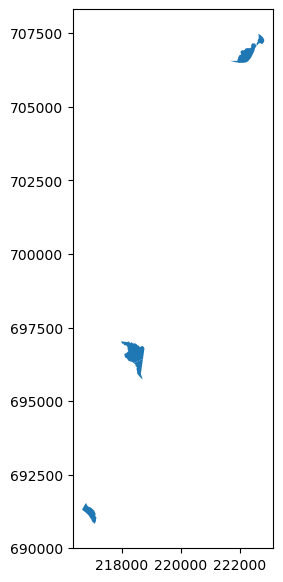

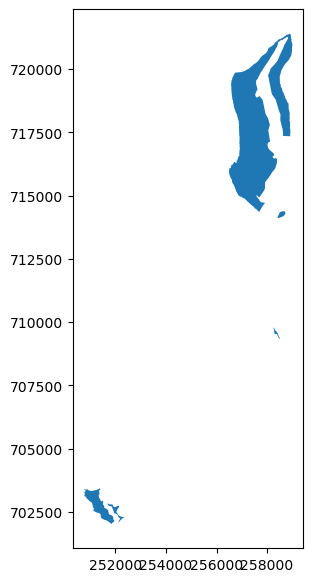

In [56]:
# Selecting the first 5 and last 5 rows
first_5 = LCA_df.head(5)
last_5 = LCA_df.tail(5)

# Plotting the first 5 records
first_5.plot()

# Plotting the last 5 records
last_5.plot()

### Task 3 

In [57]:
# Filter data first
small_sample = LCA_df[["OBJECTID","ISSUE","TYPE","LANDSCAPE_", "LAND_COVER", "Shape_Area", "geometry"]]
small_sample.head()

# Filter data to see only records which are part of the categorical attribute: 'Highland'
New_sample = small_sample['TYPE'] == 'Highland'
New_sample

New_GDF = small_sample[New_sample]
New_GDF

OBJECTID  ISSUE      TYPE              LANDSCAPE_ LAND_COVER  \
0          123      0  Highland                   Hills   Forested   
1          124      0  Highland                   Hills       Open   
2         1494      0  Highland              Glen Sides       Open   
3         1494      0  Highland              Glen Sides       Open   
4         1500      0  Highland  Strath and Glen Floors   Forested   
...        ...    ...       ...                     ...        ...   
1537      3471      0  Highland              Glen Sides   Forested   
1538      3488      0  Highland                   Hills   Forested   
1539      3491      0  Highland                   Hills   Forested   
1540      3738      0  Highland            Upland Glens   Forested   
1541      3742      0  Highland            Upland Glens   Forested   

        Shape_Area                                           geometry  
0     2.298841e+05  POLYGON ((222574.851 707084.392, 222596.350 70...  
1     5.389897e+04  POLYGON ((222574.851 707084.392, 222576.410 70...  
2     3.505045e+05  POLYGON ((218711.729 696424.784, 218630.425 69...  
3     9.978581e+04  POLYGON ((218393.312 696295.763, 218462.916 69...  
4     1.429920e+05  POLYGON ((216915.863 691040.842, 216857.855 69...  
...            ...                                                ...  
1537  2.434833e+04  POLYGON ((258491.414 709334.181, 258467.167 70...  
1538  8.290655e+06  POLYGON ((256742.753 719861.046, 256824.602 71...  
1539  5.174901e+04  POLYGON ((258695.352 714379.992, 258723.688 71...  
1540  6.044476e+05  POLYGON ((251369.855 703347.522, 251357.543 70...  
1541  8.902275e+04  POLYGON ((251756.794 702804.050, 251835.940 70...  

[1385 rows x 7 columns]

In [58]:
New_GDF.head()

OBJECTID  ISSUE      TYPE              LANDSCAPE_ LAND_COVER  \
0       123      0  Highland                   Hills   Forested   
1       124      0  Highland                   Hills       Open   
2      1494      0  Highland              Glen Sides       Open   
3      1494      0  Highland              Glen Sides       Open   
4      1500      0  Highland  Strath and Glen Floors   Forested   

      Shape_Area                                           geometry  
0  229884.074051  POLYGON ((222574.851 707084.392, 222596.350 70...  
1   53898.969256  POLYGON ((222574.851 707084.392, 222576.410 70...  
2  350504.460745  POLYGON ((218711.729 696424.784, 218630.425 69...  
3   99785.805874  POLYGON ((218393.312 696295.763, 218462.916 69...  
4  142991.992635  POLYGON ((216915.863 691040.842, 216857.855 69...

In [59]:
New_GDF.explore(column='LAND_COVER', cmap='RdYlBu')

### Task 4 

In [60]:
print(LCA_df.crs)

None


#### ESRI Shapefile CRS for LCA Loch Lomond and Trossachs = EPSG:27700

### Task 5

In [61]:
# Discover how many features the selected dataset contains:
LCA_df.shape

(1542, 25)

### Task 6

In [62]:
# Define a sub-setting filter based on a categorical attribute: Land Cover = Forested
sample1 = LCA_df[["OBJECTID","ISSUE","TYPE","LANDSCAPE_", "LAND_COVER", "Shape_Area", "geometry"]]
sample1.head()

forests = sample1['LAND_COVER'] == 'Forested'
forests.head()

forest_subset = sample1[forests]
forest_subset

OBJECTID  ISSUE          TYPE              LANDSCAPE_ LAND_COVER  \
0          123      0      Highland                   Hills   Forested   
4         1500      0      Highland  Strath and Glen Floors   Forested   
5         1500      0      Highland  Strath and Glen Floors   Forested   
6         1579      0      Highland              Glen Sides   Forested   
8           10      0  Transitional         Parallel Ridges   Forested   
...        ...    ...           ...                     ...        ...   
1537      3471      0      Highland              Glen Sides   Forested   
1538      3488      0      Highland                   Hills   Forested   
1539      3491      0      Highland                   Hills   Forested   
1540      3738      0      Highland            Upland Glens   Forested   
1541      3742      0      Highland            Upland Glens   Forested   

        Shape_Area                                           geometry  
0     2.298841e+05  POLYGON ((222574.851 707084.392, 222596.350 70...  
4     1.429920e+05  POLYGON ((216915.863 691040.842, 216857.855 69...  
5     1.121610e+05  POLYGON ((216644.400 691310.010, 216760.510 69...  
6     1.916110e+05  POLYGON ((213247.005 693919.696, 213231.586 69...  
8     4.926445e+05  POLYGON ((262054.065 709432.184, 262111.925 70...  
...            ...                                                ...  
1537  2.434833e+04  POLYGON ((258491.414 709334.181, 258467.167 70...  
1538  8.290655e+06  POLYGON ((256742.753 719861.046, 256824.602 71...  
1539  5.174901e+04  POLYGON ((258695.352 714379.992, 258723.688 71...  
1540  6.044476e+05  POLYGON ((251369.855 703347.522, 251357.543 70...  
1541  8.902275e+04  POLYGON ((251756.794 702804.050, 251835.940 70...  

[441 rows x 7 columns]

### Task 7

In [63]:
# Define a sub-setting filter based on a numerical attribute: Object ID must be over 1500
sample1 = LCA_df[["OBJECTID","ISSUE","TYPE","LANDSCAPE_", "LAND_COVER", "Shape_Area", "geometry"]]
sample1.head()

ID = sample1['OBJECTID'] > 1500
ID.head()

ID_subset = sample1[ID]
ID_subset

OBJECTID  ISSUE      TYPE    LANDSCAPE_ LAND_COVER    Shape_Area  \
6         1579      0  Highland    Glen Sides   Forested  1.916110e+05   
12        1580      0  Highland    Glen Sides       Open  5.263090e+03   
13        1580      0  Highland    Glen Sides       Open  2.034393e+03   
14        1579      0  Highland    Glen Sides   Forested  1.955709e+03   
16        1579      0  Highland    Glen Sides   Forested  2.428328e+05   
...        ...    ...       ...           ...        ...           ...   
1537      3471      0  Highland    Glen Sides   Forested  2.434833e+04   
1538      3488      0  Highland         Hills   Forested  8.290655e+06   
1539      3491      0  Highland         Hills   Forested  5.174901e+04   
1540      3738      0  Highland  Upland Glens   Forested  6.044476e+05   
1541      3742      0  Highland  Upland Glens   Forested  8.902275e+04   

                                               geometry  
6     POLYGON ((213247.005 693919.696, 213231.586 69...  
12    POLYGON ((213354.092 693755.020, 213342.097 69...  
13    POLYGON ((213363.160 693540.341, 213372.109 69...  
14    POLYGON ((213385.089 693628.057, 213360.580 69...  
16    POLYGON ((213363.160 693540.341, 213365.584 69...  
...                                                 ...  
1537  POLYGON ((258491.414 709334.181, 258467.167 70...  
1538  POLYGON ((256742.753 719861.046, 256824.602 71...  
1539  POLYGON ((258695.352 714379.992, 258723.688 71...  
1540  POLYGON ((251369.855 703347.522, 251357.543 70...  
1541  POLYGON ((251756.794 702804.050, 251835.940 70...  

[926 rows x 7 columns]

### Task 8

<AxesSubplot: >

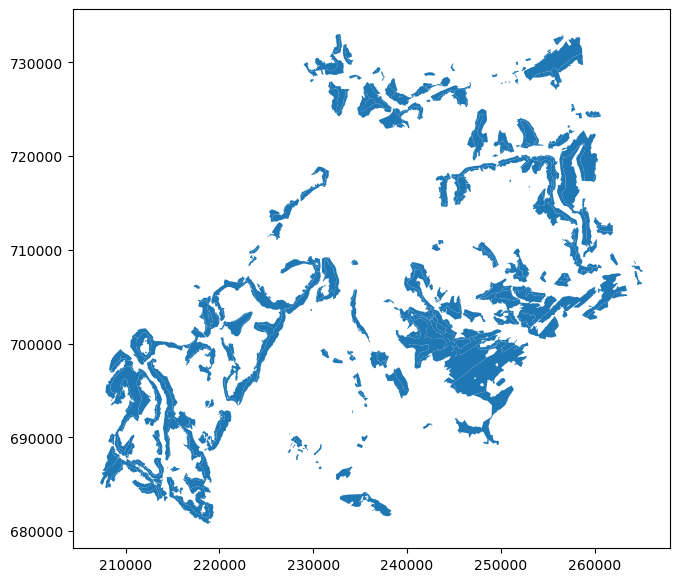

In [64]:
# View the forested area (categorical attribute subset)
forest_subset.plot()

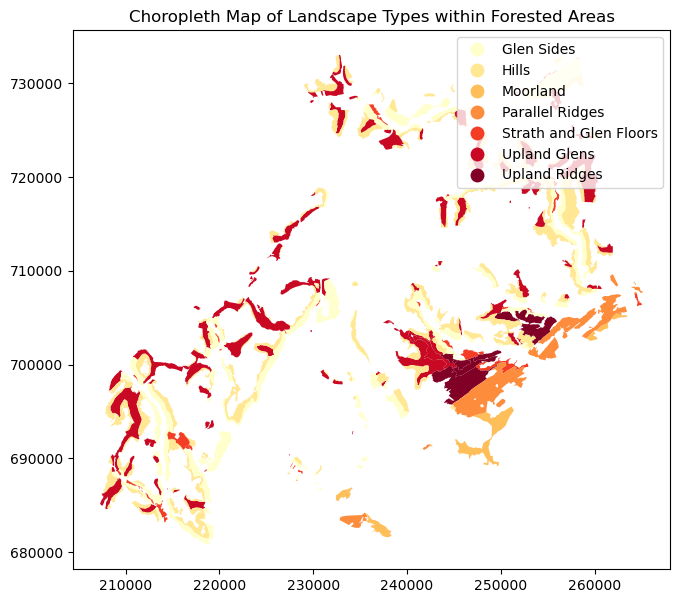

In [65]:
# Create a choropleth map using the Landscape attribute
fig, ax = plt.subplots(1, 1)
forest_subset.plot(column='LANDSCAPE_', ax=ax, legend=True, cmap='YlOrRd')
plt.title('Choropleth Map of Landscape Types within Forested Areas')
plt.show()

## Part 5: Python Rasterio

In [67]:
pip install earthpy rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.7 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


### Task 1

In [68]:
dataset = '/arcgis/home/Assignment2Data/elev.tif'

In [69]:
import rasterio as rio

elev = rio.open('/arcgis/home/Assignment2Data/elev.tif')
print(elev.name)

/arcgis/home/Assignment2Data/elev.tif


### Task 2

In [70]:
# Discover the CRS of the dataset
print(elev.crs)

EPSG:32617


### Task 3

In [71]:
# raster extent (bounds):
print(elev.bounds)

# reference system:
print(elev.crs)

# Discover how many bands are in this dataset:
print(elev.count)

BoundingBox(left=479753.39945587853, bottom=4170823.2037591375, right=668843.3994558785, top=4347733.203759138)
EPSG:32617
1


### Task 4

In [72]:
# Create a plot/map of the raster dataset

# Read into memory as a NumPy array
elev_array = elev.read()
print(elev_array.shape)

(1, 5897, 6303)


In [73]:
import numpy as np
image_read_masked = np.ma.masked_array(elev_array, mask=(elev_array == 0))

In [74]:
# Improve display by investigating min/max values
print(elev_array[0,:,:].max())
print(elev_array[0,:,:].min())

1490
-32768


Text(0.5, 1.0, 'Raster Map of Elevation')

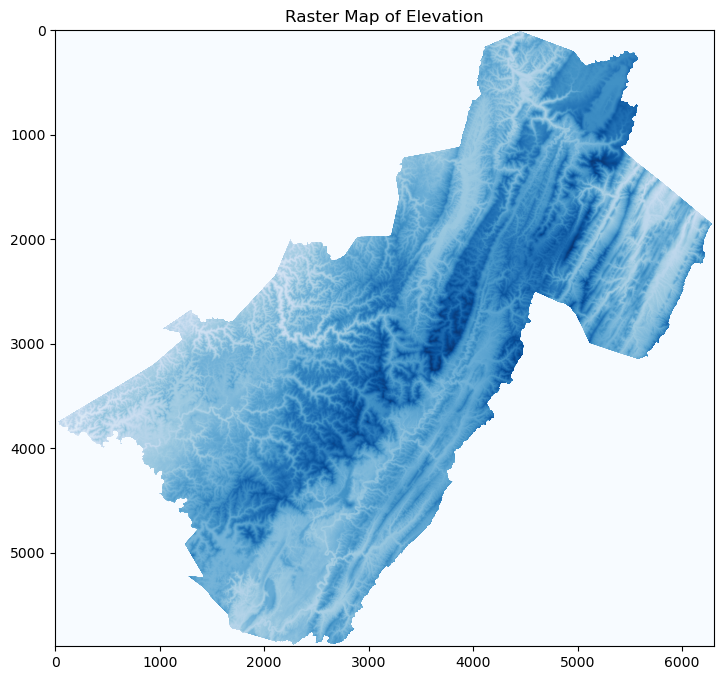

In [75]:
# Map out the visualization using matplotlib
plt.rcParams['figure.figsize'] = [10, 8]
plt.imshow(elev_array[0,:,:], cmap="Blues", vmin= 50, vmax=1490)
plt.title('Raster Map of Elevation')

### Task 5 

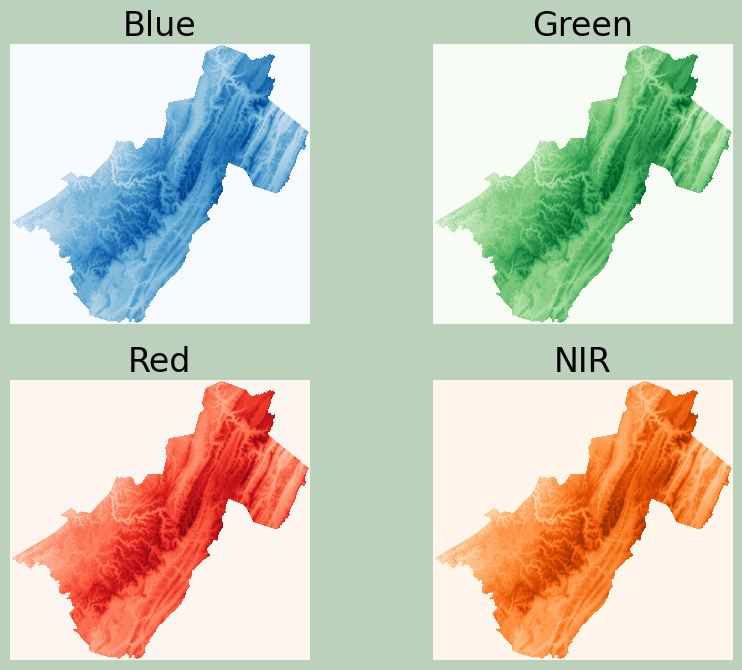

In [76]:
#Use multiple axes to display blue, green, red, and NIR bands

plt.rcParams['figure.figsize'] = [10, 8]
fig, ax = plt.subplots(2, 2)

ax[0,0].imshow(elev_array[0,:,:], cmap="Blues", vmin=50, vmax=1490)
ax[0,0].axis("off")
ax[0,0].set_title("Blue", fontsize=24, color="#000000")
ax[0,1].imshow(elev_array[0,:,:], cmap="Greens", vmin=50, vmax=1490)
ax[0,1].axis("off")
ax[0,1].set_title("Green", fontsize=24, color="#000000")
ax[1,0].imshow(elev_array[0,:,:], cmap="Reds", vmin=50, vmax=1490)
ax[1,0].axis("off")
ax[1,0].set_title("Red", fontsize=24, color="#000000")
ax[1,1].imshow(elev_array[0,:,:], cmap="Oranges", vmin=50, vmax=1490)
ax[1,1].axis("off")
ax[1,1].set_title("NIR", fontsize=24, color="#000000")
fig.patch.set_facecolor('#bcd1bc')

In [77]:
# Create Histograms from the raster

#import earthpy under different name
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

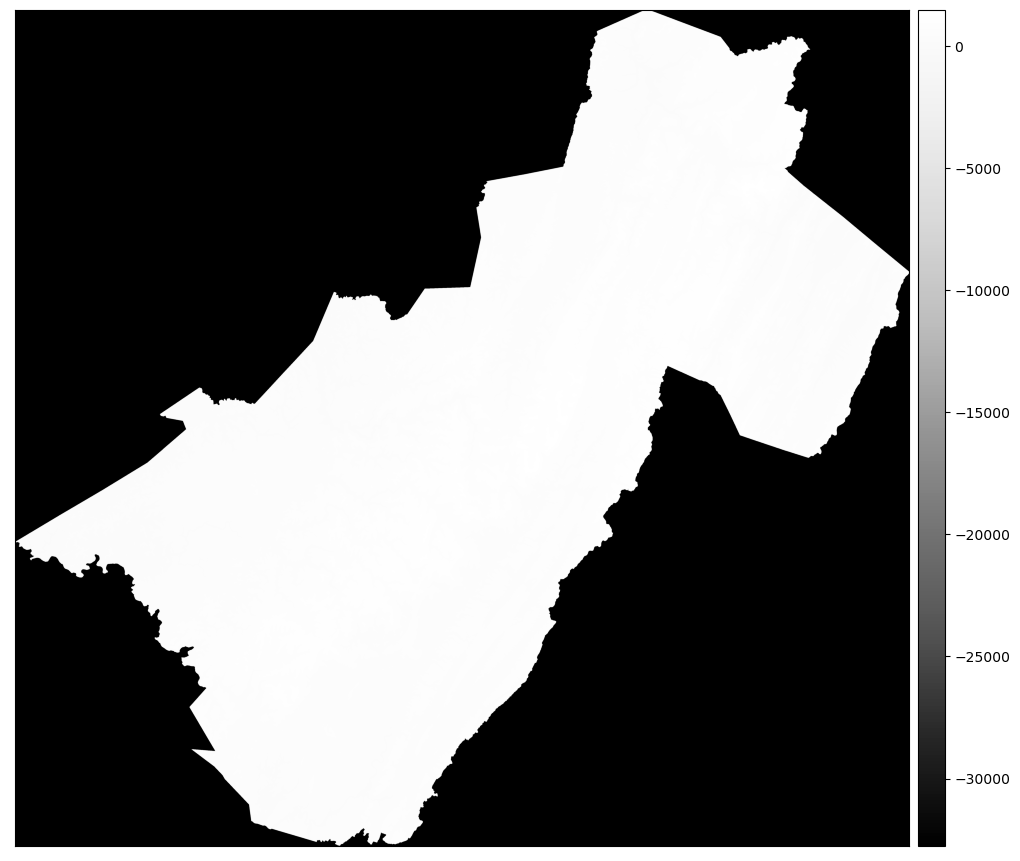

In [78]:
ep.plot_bands(elev_array, cols=2)
plt.show()

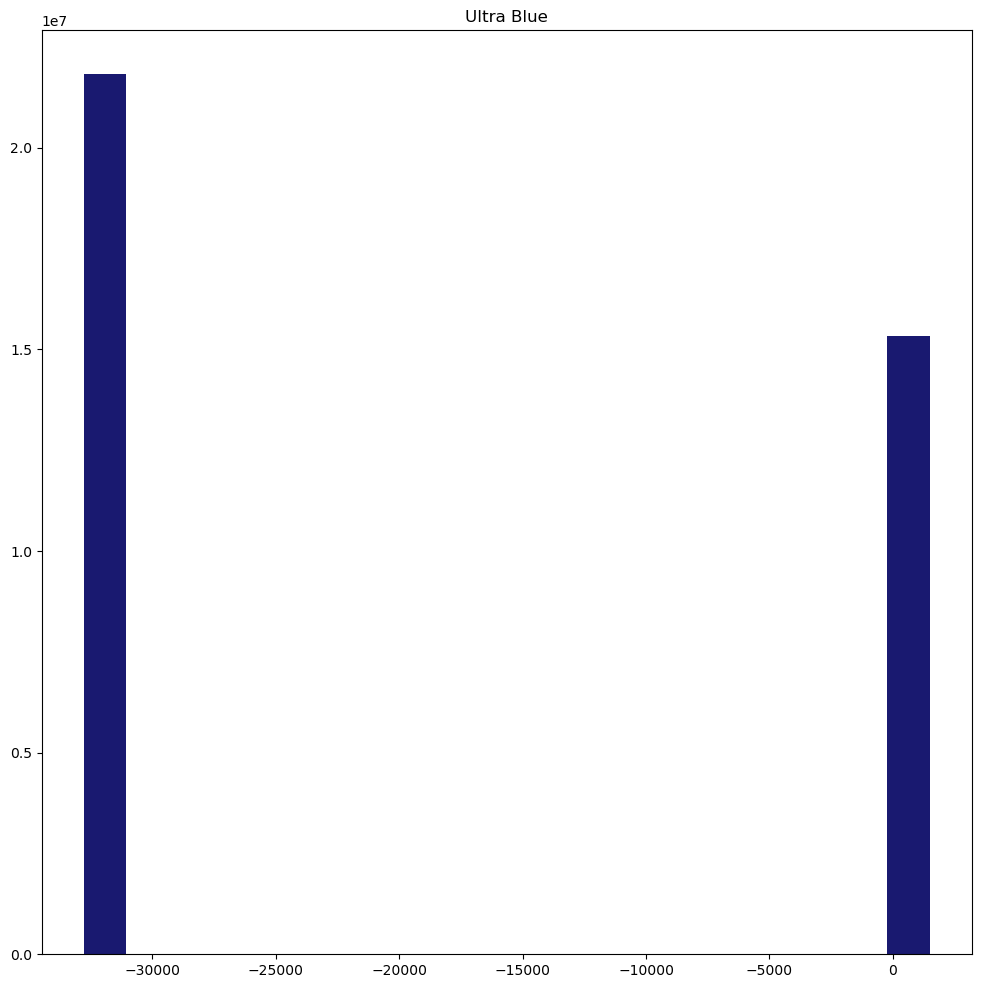

In [197]:
colors_list = [
    "midnightblue",
    "Blue",
    "Green",
    "Red",
    "Maroon",
    "Purple",
    "Violet",
    "yellow"
]
titles = ["Ultra Blue"]

ep.hist(elev_array, colors=colors_list, title=titles)
plt.show()

## Part 6: K-Means - DBSCAN clustering - (see Google Colab)